In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [15]:
restaurant_data = pd.read_csv('Dataset .csv')

In [17]:
required_columns = ['Latitude', 'Longitude', 'City', 'Aggregate rating', 'Price range', 'Cuisines', 'Restaurant ID']
missing_columns = [col for col in required_columns if col not in restaurant_data.columns]

if missing_columns:
    raise ValueError(f"Dataset is missing required columns: {missing_columns}")

In [25]:
def plot_geographic_distribution(data, lat_col, long_col):
    print("Creating geographic distribution scatter plot...")
    plt.figure(figsize=(10, 8))
    plt.scatter(data[long_col], data[lat_col], alpha=0.5, s=20, c='blue', label='Restaurants')
    plt.title("Geographic Distribution of Restaurants", fontsize=16)
    plt.xlabel("Longitude", fontsize=12)
    plt.ylabel("Latitude", fontsize=12)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig('restaurant_geographic_distribution.png')
    plt.show()

In [27]:
def create_heatmap(data, lat_col, long_col, output_file):
    print("Creating heatmap of restaurant locations...")
    avg_lat = data[lat_col].mean()
    avg_long = data[long_col].mean()

    map_restaurants = folium.Map(location=[avg_lat, avg_long], zoom_start=12)
    heat_data = data[[lat_col, long_col]].dropna().values.tolist()
    HeatMap(heat_data).add_to(map_restaurants)
    map_restaurants.save(output_file)
    print(f"Heatmap saved as: {output_file}")

heatmap_file = "restaurant_heatmap.html"

In [29]:
def analyze_by_city(data):
    print("Grouping and analyzing data by city...")
    grouped_city = data.groupby('City').agg({
        'Restaurant ID': 'count',
        'Aggregate rating': 'mean',
        'Price range': 'mean',
        'Cuisines': lambda x: x.mode()[0] if not x.mode().empty else None
    }).rename(columns={
        'Restaurant ID': 'Restaurant Count',
        'Aggregate rating': 'Average Rating',
        'Price range': 'Average Price Range',
        'Cuisines': 'Top Cuisine'
    }).reset_index()
    return grouped_city

In [43]:
def plot_city_distribution(data, count_col, city_col):
    print("Plotting city-wise restaurant distribution...")
    top_cities = data.nlargest(15, count_col)
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_cities, x=city_col, y=count_col, edgecolor='black')
    plt.title("Top 15 Cities with the Most Restaurants", fontsize=16)
    plt.xlabel("City", fontsize=12)
    plt.ylabel("Number of Restaurants", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig('top_cities_restaurant_count.png')
    plt.show()

In [45]:
def extract_insights(data):
    print("Extracting insights...")
    insights = []
    highest_rating_city = data.loc[data['Average Rating'].idxmax()]
    insights.append(
        f"City with the highest average rating: {highest_rating_city['City']} ({highest_rating_city['Average Rating']:.2f})")

    most_restaurants_city = data.loc[data['Restaurant Count'].idxmax()]
    insights.append(
        f"City with the most restaurants: {most_restaurants_city['City']} ({most_restaurants_city['Restaurant Count']})")

    return insights

In [47]:
def plot_city_ratings(data, rating_col, city_col):
    print("Plotting average ratings of top cities...")
    top_cities = data.nlargest(15, 'Restaurant Count')
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_cities, x=city_col, y=rating_col, edgecolor='black')
    plt.title("Average Ratings of Top 15 Cities by Restaurant Count", fontsize=16)
    plt.xlabel("City", fontsize=12)
    plt.ylabel("Average Rating", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig('top_cities_average_ratings.png')
    plt.show()

Step 1: Visualizing Geographic Distribution...
Creating geographic distribution scatter plot...


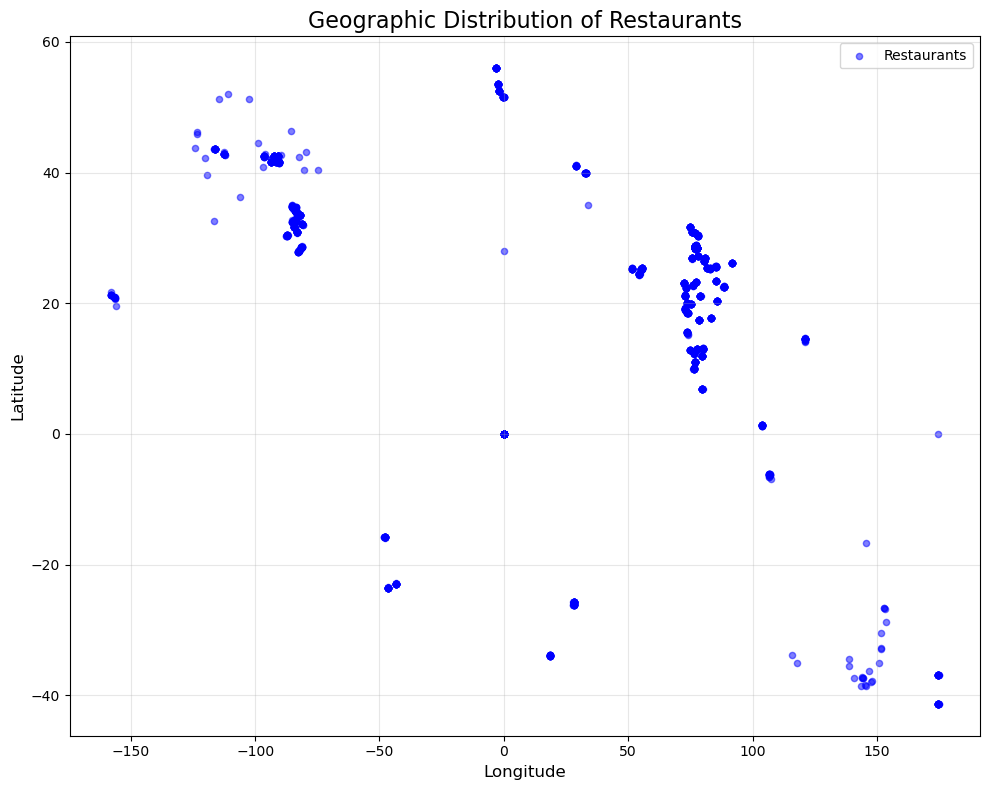

Creating heatmap of restaurant locations...
Heatmap saved as: restaurant_heatmap.html

Step 2: Analyzing by City...
Grouping and analyzing data by city...
        City  Restaurant Count  Average Rating  Average Price Range  \
0  Abu Dhabi                20        4.300000             3.300000   
1       Agra                20        3.965000             2.650000   
2  Ahmedabad                21        4.161905             2.571429   
3     Albany                20        3.555000             1.700000   
4  Allahabad                20        3.395000             2.650000   

                                        Top Cuisine  
0                                          American  
1                             North Indian, Mughlai  
2  Cafe, American, Continental, Armenian, Fast Food  
3                            Japanese, Steak, Sushi  
4                             North Indian, Chinese  

Step 3: Visualizing Restaurant Distribution...
Plotting city-wise restaurant distribution...


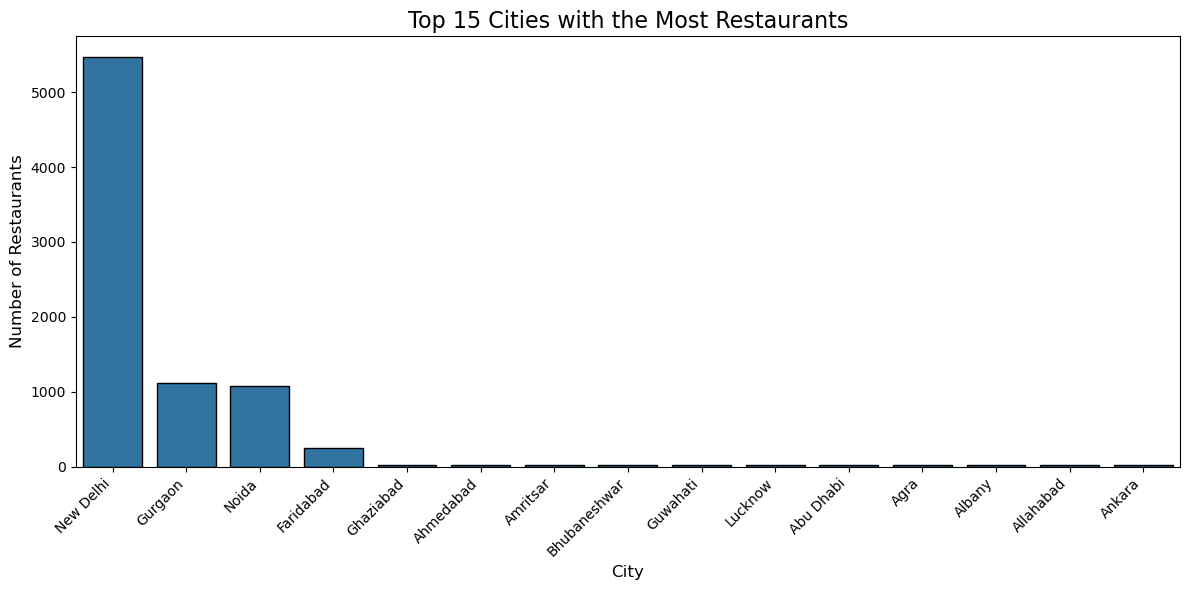


Step 4: Extracting Insights...
Extracting insights...
City with the highest average rating: Inner City (4.90)
City with the most restaurants: New Delhi (5473)

Step 5: Visualizing Average Ratings by City...
Plotting average ratings of top cities...


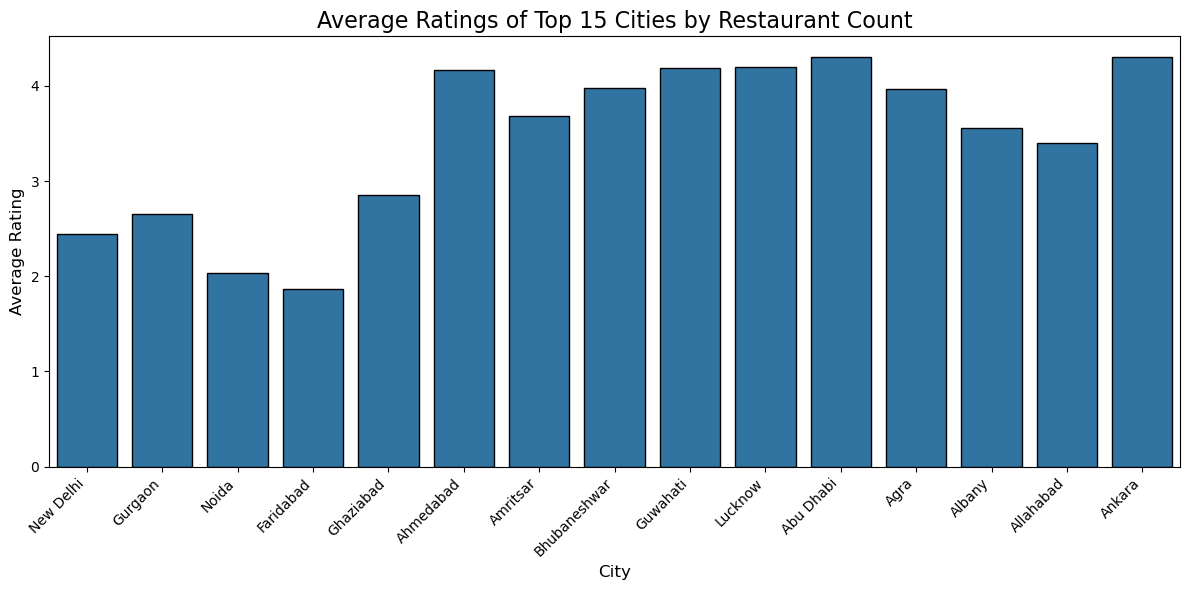

In [49]:
print("Step 1: Visualizing Geographic Distribution...")
plot_geographic_distribution(restaurant_data, 'Latitude', 'Longitude')
create_heatmap(restaurant_data, 'Latitude', 'Longitude', heatmap_file)

print("\nStep 2: Analyzing by City...")
grouped_city = analyze_by_city(restaurant_data)
print(grouped_city.head())

print("\nStep 3: Visualizing Restaurant Distribution...")
plot_city_distribution(grouped_city, 'Restaurant Count', 'City')

print("\nStep 4: Extracting Insights...")
insights = extract_insights(grouped_city)
for insight in insights:
    print(insight)

print("\nStep 5: Visualizing Average Ratings by City...")
plot_city_ratings(grouped_city, 'Average Rating', 'City')